<a href="https://colab.research.google.com/github/Belal-AI/Predicting-disaster-tweets-using-LSTM-/blob/main/Predicting_disaster_tweets_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1)Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [2]:
train_data = pd.read_csv("train.csv")
train_data.shape

(7613, 5)

#2)Check head and info of the data

In [3]:
train_data.head() # the top 4 of data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#3)Percentage of nulls

In [4]:
total_nullss_values = train_data.isna().sum().sum() ## summ all summtion of the nulls 
percentage_of_missing_valeus = (total_nullss_values/train_data.shape[0])*100 #percentage of nulls

percentage_of_missing_valeus

34.073295678444765

#4)the Percentage of data between each claas and the value 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


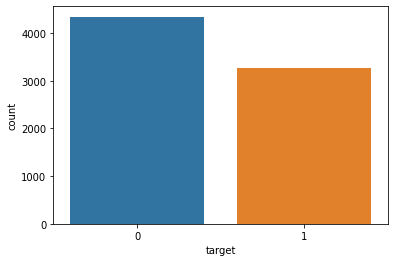

In [5]:
sns.countplot(train_data['target'])

#5)top 15 locations of the data

In [6]:
train_data['location'].mode() # the most repeteted country 

0    USA
dtype: object

In [7]:
train_data['location'].fillna('USA',inplace=True) ## fill the null by mode 

In [8]:
train_data['location'].value_counts().head(15) ## the top 15

USA                2637
New York             71
United States        50
London               45
Canada               29
Nigeria              28
UK                   27
Los Angeles, CA      26
India                24
Mumbai               22
Washington, DC       21
Kenya                20
Worldwide            19
Australia            18
Chicago, IL          18
Name: location, dtype: int64

#6) Get the top 15 keyword in the data

In [9]:
train_data['keyword'].value_counts().head(15) ## the top15 of the keywords

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
Name: keyword, dtype: int64

In [10]:
train_data['keyword'].fillna('fatalities',inplace=True) ## file the nulls by
train_data['keyword'].value_counts().head(15)

fatalities     106
deluge          42
armageddon      42
damage          41
harm            41
body%20bags     41
sinking         41
siren           40
evacuate        40
fear            40
outbreak        40
twister         40
windstorm       40
collided        40
sunk            39
Name: keyword, dtype: int64

#7) What are the most common words?

####Cleaning tweets

In [11]:
import re
tweets = train_data['text'] 
tweets[:10]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

In [12]:
def Removingunicodes(word): ##removing the words with funny letters 
  temp = word.encode("ascii", "ignore")
  temp = temp.decode()
  return temp

In [13]:
def Cleantexts(text): # reomving the last and first spaces ,links , dots and emotions 
  text = re.sub(r'#\w*','',text)
  text = re.sub(r'@\w*','',text)
  text = re.sub(r'https?:\S+','',text)
  text = re.sub(r'\d+','',text)
  text = re.sub(r'\W+',' ',text)
  text = re.sub(r'^\s','',text)
  text = re.sub(r'\s$','',text)
  text = re.sub(r'_','',text)


  return text

In [14]:
cleaned_tweets = []
for tweet in tweets:
  cleaned_tweets.append(Cleantexts(tweet))

In [15]:
no_uni = []
for tweet in cleaned_tweets:
  no_uni.append(Removingunicodes(tweet))

In [16]:
list_of_tweets = []   #toknize the tweets manually
for tweet in no_uni:
  list_of_tweets.append(tweet.split())
list_of_tweets[:2]

[['Our',
  'Deeds',
  'are',
  'the',
  'Reason',
  'of',
  'this',
  'May',
  'ALLAH',
  'Forgive',
  'us',
  'all'],
 ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada']]

In [17]:
words = [] ##ravel the list of  words to can get the top repeted words and stopwords
for sentence in list_of_tweets:
  for word in sentence:
    words.append(word)


In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') ##get all the stopwrds

def remove_stopwords(words): 
  WORDS = []
  for word in words:
    if word.lower() not in stop_words:   ##check if the word is stop or not with making sure its small word 
      WORDS.append(word)
  return WORDS

#The most Common stop words 

In [20]:
from collections import Counter
most_Stop_words=Counter(words).most_common
most_Stop_words()[:5] ##showing the top stopwords

[('the', 2603), ('a', 1891), ('to', 1819), ('in', 1782), ('of', 1738)]

In [21]:
words = remove_stopwords(words) ##removing the stop words 

#The most common words 

In [22]:
from collections import Counter
Counter(words).most_common()[:5] ## the most common words

[('amp', 344), ('like', 324), ('via', 213), ('get', 184), ('fire', 174)]

# Removing the stop-words from the words of the statements not the list of words which is raveled

In [23]:
for tweet_worded in list_of_tweets:
  for word in tweet_worded:
    if word.lower() in stop_words or word in stop_words or word.upper() in stop_words or word=='us':
      tweet_worded.remove(word)
    

  

In [24]:
list_of_tweets[:3]

[['Deeds', 'the', 'Reason', 'this', 'May', 'ALLAH', 'Forgive', 'all'],
 ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada'],
 ['residents',
  'asked',
  'shelter',
  'place',
  'being',
  'notified',
  'officers',
  'other',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected']]

In [25]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def preparing_wrods(tweets):
  prepared_tweet=[]
  for tweet in tweets:
    tweet=[ps.stem(word) for word in tweet]
    prepared_tweet.append(tweet)
  return prepared_tweet

In [26]:
len(list_of_tweets)

7613

In [27]:
list_of_tweets=preparing_wrods(list_of_tweets)

In [28]:
list_of_tweets[:5]

[['deed', 'the', 'reason', 'thi', 'may', 'allah', 'forgiv', 'all'],
 ['forest', 'fire', 'near', 'La', 'rong', 'sask', 'canada'],
 ['resid',
  'ask',
  'shelter',
  'place',
  'be',
  'notifi',
  'offic',
  'other',
  'evacu',
  'shelter',
  'place',
  'order',
  'expect'],
 ['peopl', 'receiv', 'evacu', 'order', 'california'],
 ['got', 'sent', 'photo', 'rubi', 'smoke', 'pour', 'a', 'school']]

##import the tokener and pad_sequncer
 to token the tweets to digits and estiamte range of padding to each tweet

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
tokener=Tokenizer()
tokener.fit_on_texts(list_of_tweets)
tweets_squenced=tokener.texts_to_sequences(list_of_tweets)
tweets_squenced[:2]

[[3521, 1, 531, 56, 120, 2423, 2863, 98], [183, 5, 224, 650, 4863, 4864, 1252]]

In [36]:
paded_squencesed_tweets=pad_sequences(tweets_squenced,maxlen=30)
paded_squencesed_tweets[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        3521,    1,  531,   56,  120, 2423, 2863,   98],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  183,    5,  224,  650, 4863, 4864, 1252]], dtype=int32)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
import tensorflow as tf
len(tokener.word_index)

9982

In [49]:
target=train_data.iloc[:,-1]
target

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

##Split the data to train and validate 

In [50]:
from sklearn.model_selection import train_test_split
trainx,validx,trainy,validy=train_test_split(paded_squencesed_tweets,target)


## Model Building 

In [126]:
model = Sequential()
model.add(Embedding(10000,10,input_length=30))

model.add(LSTM(128))

model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 30, 10)            100000    
                                                                 
 lstm_12 (LSTM)              (None, 128)               71168     
                                                                 
 dense_24 (Dense)            (None, 32)                4128      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 175,329
Trainable params: 175,329
Non-trainable params: 0
_________________________________________________________________


#Training

In [127]:
history=model.fit(np.array(trainx),np.array(trainy).reshape(-1,1),epochs=5,validation_data=(np.array(validx),np.array(validy).reshape(-1,1)),verbose=True)

Epoch 1/5
179/179 [==============================] - 11s 44ms/step - loss: 0.5939 - accuracy: 0.6849 - val_loss: 0.4931 - val_accuracy: 0.7731
Epoch 2/5
179/179 [==============================] - 8s 47ms/step - loss: 0.4181 - accuracy: 0.8245 - val_loss: 0.4635 - val_accuracy: 0.7805
Epoch 3/5
179/179 [==============================] - 7s 42ms/step - loss: 0.3611 - accuracy: 0.8525 - val_loss: 0.4638 - val_accuracy: 0.7778
Epoch 4/5
179/179 [==============================] - 7s 42ms/step - loss: 0.3283 - accuracy: 0.8679 - val_loss: 0.4939 - val_accuracy: 0.7742
Epoch 5/5
179/179 [==============================] - 7s 41ms/step - loss: 0.3059 - accuracy: 0.8781 - val_loss: 0.4713 - val_accuracy: 0.7831


## analyz the accuracy and loss 
the model has a littel of overfitting cause the dataset complexity not enough 

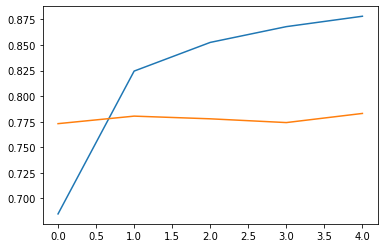

In [129]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

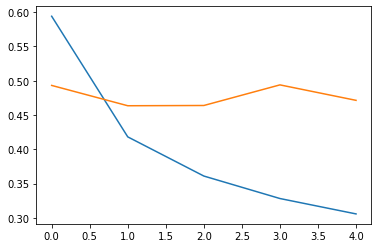

In [130]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Reading the test data ana prepare it 

In [72]:
test_Data= pd.read_csv("test.csv")
test_Data.shape
test_tweets=test_Data['text']

In [76]:
cleaned_testedtweets = []
for tweet in test_tweets:
  cleaned_testedtweets.append(Cleantexts(tweet))

In [78]:
no_uni_test = []
for tweet in cleaned_testedtweets:
  no_uni_test.append(Removingunicodes(tweet))

In [79]:
list_of_tweets_test = []   #toknize the tweets manually
for tweet in no_uni_test:
  list_of_tweets_test.append(tweet.split())
list_of_tweets_test[:2]

[['Just', 'happened', 'a', 'terrible', 'car', 'crash'],
 ['Heard', 'about', 'is', 'different', 'cities', 'stay', 'safe', 'everyone']]

In [84]:
for tweet_worded in list_of_tweets_test:
  for word in tweet_worded:
    if word.lower() in stop_words or word in stop_words or word.upper() in stop_words or word=='us':
      tweet_worded.remove(word)

In [85]:
list_of_tweets_test[:2]

[['happened', 'terrible', 'car', 'crash'],
 ['Heard', 'different', 'cities', 'stay', 'safe', 'everyone']]

In [87]:
 list_of_tweets_test=preparing_wrods(list_of_tweets_test)

In [92]:
list_of_tweets_test[:2]

[['happen', 'terribl', 'car', 'crash'],
 ['heard', 'differ', 'citi', 'stay', 'safe', 'everyon']]

In [93]:
tokener2=Tokenizer()
tokener2.fit_on_texts(list_of_tweets_test)
tweets_squenced=tokener2.texts_to_sequences(list_of_tweets_test)
tweets_squenced[:2]

[[100, 815, 68, 20], [223, 944, 145, 494, 661, 351]]

In [95]:
paded_sequenceses_tweets_Test=pad_sequences(tweets_squenced,maxlen=30)
paded_sequenceses_tweets_Test[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        100, 815,  68,  20],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 223, 944,
        145, 494, 661, 351]], dtype=int32)

In [115]:
ypred=model.predict(paded_sequenceses_tweets_Test)

In [116]:
for i in range(len(ypred)):
  if ypred[i]>=.5:
    ypred[i]=1
  else:
    ypred[i]=0

## checking model by unseen data

In [148]:
ypred[10:20]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [149]:
list_of_tweets_test[10:20]

[['like', 'cold'],
 ['nooooooooo'],
 ['tell'],
 [],
 ['awesom'],
 ['birmingham',
  'wholes',
  'market',
  'ablaz',
  'bbc',
  'new',
  'fire',
  'break',
  'birmingham',
  'wholes',
  'market'],
 ['wear', 'short', 'race', 'ablaz'],
 ['toke',
  'makinwa',
  'marriag',
  'crisi',
  'set',
  'nigerian',
  'twitter',
  'ablaz'],
 ['check'],
 ['psa', 'split', 'person', 'techi', 'follow', 'burner', 'follow']]